Usando a CPU para o treinamento.
11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 69s 67ms/step - loss: 0.2463 - accuracy: 0.9246 - val_loss: 0.0725 - val_accuracy: 0.9766
Epoch 2/10
938/938 [==============================] - 59s 63ms/step - loss: 0.0726 - accuracy: 0.9788 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 3/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0536 - accuracy: 0.9842 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 4/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0417 - accuracy: 0.9880 - val_loss: 0.0253 - val_accuracy: 0.9917
Epoch 5/10
938/938 [==============================] - 57s 60ms/step - loss: 0.0361 - accuracy: 0.9895 - val_loss: 0.0252 - val_accuracy: 0.9916
Epoch 6/10
938/938 [==============================] - 53s 57ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0275 - val_accuracy: 0.9916
Epoch 7/10
938/938 [==================

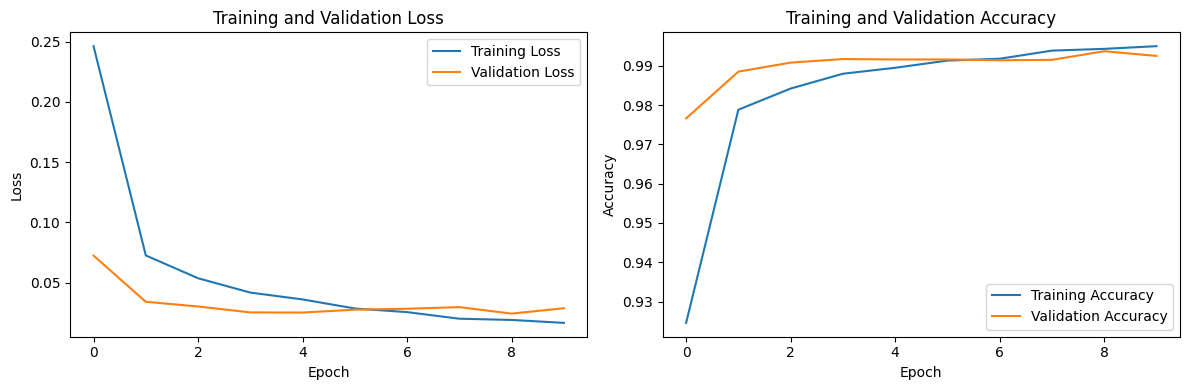

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Configurar o TensorFlow para usar a GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
else:
    print("Usando a CPU para o treinamento.")

# Carregar e preparar o dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar os dados
x_train = np.expand_dims(x_train, axis=-1)  # Adicionar dimensão para canais
x_test = np.expand_dims(x_test, axis=-1)

# Codificar as labels em vetores binários (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Definir hiperparâmetros fixos
filters = 32
dense_units = 128
dropout_rate = 0.5
batch_size = 64
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Criar e compilar o modelo CNN
model = models.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))  # Definir a forma de entrada
model.add(layers.Conv2D(filters, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters * 2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters * 2, (3, 3), activation='relu'))
model.add(layers.Flatten())  # Flatten para transformar a saída em um vetor
model.add(layers.Dense(dense_units, activation='relu'))  # Camada densa
model.add(layers.Dropout(dropout_rate))  # Camada de dropout
model.add(layers.Dense(10, activation='softmax'))  # Camada de saída

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=1
)

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy}")

# Plotar as curvas de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()
